# A5-Q3Q4: DCT and JPEG Compression

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

## Q3: Discrete Cosine Transform

### Some helper functions

In [3]:
def EvenExtension(f):
    '''
     fe = EvenExtension(f)
     
     Performs an even extension on the array f.
    
     Input:
       f is a 2D array
    
     Output:
       fe is the even extension of f
    
     If f has dimensions NxM, then fe has dimensions
        (2*N-2)x(2*M-2)
     and fe[n,j]=fe[-n,j] for n=0,...,N-1
     and fe[n,j]=fe[n,-j] for j=0,...,M-1
    
     For example, if f is 5x4, then fe has dimensions 8x6.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''
    fe = np.concatenate((f,np.fliplr(f[:,1:-1])), axis=1)
    fe = np.concatenate((fe, np.flipud(fe[1:-1,:])), axis=0)
    
    return fe

def IEvenExtension(fe):
    '''
     f = IEvenExtension(fe)
    
     Reverses the action of an even extension.
    
     Input:
       fe is a 2D array, assumed to contain an even extension
    
     Output:
       f is the sub-array that was used to generate the extension
    
     If fe has dimensions KxL, then f has dimensions
        ceil((K+1)/2) x ceil((L+1)/2)
     For example, if fe is 8x6, then f is 5x4.
    
     IEvenExtension is the inverse of EvenExtension, so that
        IEvenExtension(EvenExtension(f)) == f
     for any matrix f.
    
    '''
    e_dims = np.array(np.shape(fe))
    dims = np.ceil((e_dims+1.)/2)
    dims = np.array(dims, dtype=int)
    f = fe[:dims[0], :dims[1]]
    #f = fe(1:dims(1),1:dims(2));
    return f

In [4]:
# First, a simple 1D example.
f = np.array([[1,2,3,4,5]])
fe = EvenExtension(f)
print(fe)

[[1 2 3 4 5 4 3 2]]


In [5]:
# Define a simple 2-D array to play with
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=float)
print(f)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


In [6]:
# Even extension
fe = EvenExtension(f)
print(fe)

[[ 1.  2.  3.  4.  3.  2.]
 [ 5.  6.  7.  8.  7.  6.]
 [ 9. 10. 11. 12. 11. 10.]
 [ 5.  6.  7.  8.  7.  6.]]


In [7]:
# Check that it's even, if you don't believe me
n = np.random.randint(np.shape(f)[0])
j = np.random.randint(np.shape(f)[1])
print((n,j))
print(fe[n,j])
print(fe[-n,-j])

(1, 3)
8.0
8.0


In [8]:
# Inverse even extension
g = IEvenExtension(fe)
print(g)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


### `myDCT`

In [52]:
def myDCT(f):
    '''
     F = myDCT(f)
    
     Computes the 2-D Discrete Cosine Transform of input image f.
     It uses an even extension of f, along with the 2D-DFT.
     This function is the inverse of myIDCT.
    
     Input:
      f is a 2-D array of real values
    
     Output:
      F is a real-valued array the same size as f
    '''
    F = np.zeros_like(f)
    # ==== YOUR CODE HERE ====
    N = len(f)
    M = len(f[0])
    g = EvenExtension(f)
    #print("extension:")
    #print(g)
    G = fft2(g)
    #Ng = len(g)
    #Mg = len(g[0])
    #G = np.zeros_like(g)
    #print("N = "+str(N)+", M = "+str(M)+", Ng = "+str(Ng)+", Mg = "+str(Mg))
    #WNg = np.exp([2*np.pi*np.sqrt(-1+0j)/Ng])[0]
    #WMg = np.exp([2*np.pi*np.sqrt(-1+0j)/Mg])[0]
    #for k in range(Ng):
    #    for l in range(Mg):
    #        for n in range(Ng):
    #            for m in range(Mg):
    #                G[k][l] += g[n][m]*pow(WNg,-n*k)*pow(WMg,-m*l)
    #        G[k][l] = G[k][l]*1/(Ng*Mg)
                    
    for k in range(N):
        for l in range(M):
            F[k][l] = G[k][l]

    return np.real(F)

### `myIDCT`

In [53]:
def myIDCT(F):
    '''
     f = myIDCT(F)
    
     Computes the 2-D Inverse Discrete Cosine Transform (IDCT) of input
     array Fdct. It uses an even extension of Fdct, along with the 2D-IDFT.
     This function is the inverse of myDCT.
    
     Input:
      F is a 2-D array of real values
    
     Output:
      f is a real-valued array the same size as Fdct
    '''
    f = np.zeros_like(F)
    g = np.zeros_like(F)
    # ==== YOUR CODE HERE ====
    #N = len(F)
    #M = len(F[0])
    #WN = np.exp([2*np.pi*np.sqrt(-1+0j)/N])[0]
    #WM = np.exp([2*np.pi*np.sqrt(-1+0j)/M])[0]
    #for k in range(N):
    #    for l in range(M):
    #        for n in range(N):
    #            for m in range(M):
    #                g[k][l] += F[n][m]*pow(WN,n*k)*pow(WM,m*l)
    #
    F2 = EvenExtension(F)
    g = ifft2(F2)
    f = IEvenExtension(g)
    
    return np.real(f)

In [54]:
from scipy.fft import dct, idct
f = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]], dtype=float)
print(f)
F = myDCT(f)
Freal = dct(dct(f.T, type=1).T, type=1)
print("found F:")
print(F)
print("actual F:")
print(Freal)
g = myIDCT(F)
print(g)
greal = np.real(idct(idct(Freal.T, type=1).T, type=1))
print(greal)

[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
found F:
[[ 1.5600000e+02 -1.6000000e+01 -8.8817842e-16 -4.0000000e+00]
 [-4.8000000e+01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]]
actual F:
[[ 1.5600000e+02 -1.6000000e+01 -8.8817842e-16 -4.0000000e+00]
 [-4.8000000e+01  0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]
[[ 1.  2.  3.  4.]
 [ 5.  6.  7.  8.]
 [ 9. 10. 11. 12.]]


/srv/jupyter_python3-extras/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


## Here are some built-in implementations...
... in case you're having trouble with `myDCT` and `myIDCT`.

In [55]:
# '''
# These work for 2D arrays only.
# '''
# from scipy.fft import dct, idct
# def myDCT(f):
#     t = 1
#     return dct(dct(f.T, type=t).T, type=t)
# def myIDCT(F):
#     return np.real(idct(idct(F.T, type=1).T, type=1))

## Q4: JPEG Compression

In [56]:
# A couple functions to help you
def NumPixels(f):
    '''
     n = NumPixels(f) returns the total number of elements in the array f.
     
     For example,
       NumPixels( np.ones((5,4)) )
     returns the value 20.
    '''
    return np.prod(np.shape(f))

def Show(g, title=''):
    '''
     Show(g, title='')
     
     Displays the image g as a graylevel image with intensities
     clipped to the range [0,255].
    '''
    plt.imshow(np.clip(g, a_min=0, a_max=255), cmap='gray');
    plt.axis('off');
    plt.title(title);

### `myJPEGCompress`

In [65]:
def myJPEGCompress(f, T, D):
    '''
     G = myJPEGCompress(f, T, D)
    
     Input
        f is the input image, a 2D array of real numbers
        T is the tile size to break the input image into
        D is the size of the block of Fourier coefficients to keep
          (Bigger values of D result in less loss, but less compression)
    
     Output
        G is the compressed encoding of the image
    
     Example: If f is 120x120, then
    
        G = myJPEGCompress(f, 10, 4)
    
     would return an array (G) of size 48x48.
    '''
    h,w = np.shape(f)  # returns the width and height of f
    G = np.zeros( (int(np.floor(h/T)*D), int(np.floor(w/T)*D)) ) # this is not guaranteed to be the right size
    # ==== YOUR CODE HERE ====
    for i in range(int(np.floor(h/T))):
        for j in range(int(np.floor(w/T))):
            tile = np.zeros((T,T))
            for k in range(T):
                for l in range(T):
                    tile[k][l] = f[i*T+k][j*T+l]
            tileDCT = myDCT(tile)
            for k in range(D):
                for l in range(D):
                    G[i*D+k][j*D+l] = tileDCT[k][l]
    
    return G

### `myJPEGDecompress`

In [66]:
def myJPEGDecompress(G, T, D):
    '''
     f = myJPEGDecompress(G, T, D)
    
     Input
        G is the compressed encoding, a 2D array of real numbers
        T is the tile size for reassembling the decompressed image
        D is the size of the blocks of Fourier coefficients that were
          kept when the image was compressed
          (Bigger values of D result in less loss, but less compression)
    
     Output
        f is the decompressed, reconstructed image
    
     Example: If G is 48x48, then
    
        f = myJPEGDecompress(G, 10, 4);
    
     would return an array (f) of size 120x120.
    '''
    n_hblocks = int( np.shape(G)[0]/D )
    n_wblocks = int( np.shape(G)[1]/D )
    
    f = np.zeros( (T*n_hblocks, T*n_wblocks) )
    
    wblocks = np.arange(0, np.shape(f)[1], T)
    hblocks = np.arange(0, np.shape(f)[0], T)
    
    # ==== YOUR CODE HERE ====
    for i in range(n_hblocks):
        for j in range(n_wblocks):
            tile = np.zeros((T,T))
            for k in range(D):
                for l in range(D):
                    tile[k][l] = G[i*D+k][j*D+l]
            Ttile = myIDCT(tile)
            for k in range(T):
                for l in range(T):
                    f[i*T+k][j*T+l] = Ttile[k][l]
    return f

### Demonstrate Compression

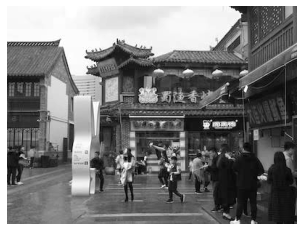

In [67]:
f = plt.imread('Jinan.jpg')[:,:,0]
Show(f)

In [72]:
# Set the tile size
T = 10

In [73]:
# Compression ratio 2:1
D = 7
compressed1 = myJPEGCompress(f, T, D)
decompressed1 = myJPEGDecompress(compressed1, T, D)

/srv/jupyter_python3-extras/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [74]:
# Compression ratio 4:1
D = 5
compressed2 = myJPEGCompress(f, T, D)
decompressed2 = myJPEGDecompress(compressed2, T, D)

/srv/jupyter_python3-extras/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


In [75]:
# Compression ratio 25:1
D = 2
compressed3 = myJPEGCompress(f, T, D)
decompressed3 = myJPEGDecompress(compressed3, T, D)

/srv/jupyter_python3-extras/lib/python3.7/site-packages/ipykernel_launcher.py:38: ComplexWarning: Casting complex values to real discards the imaginary part


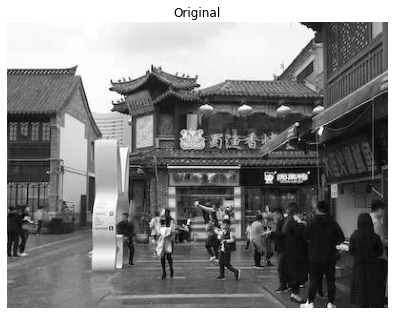

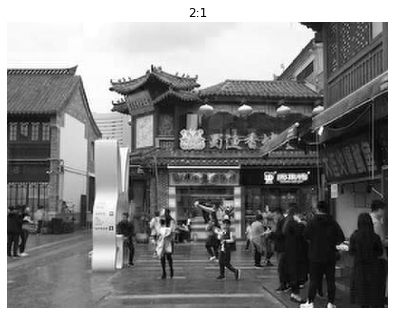

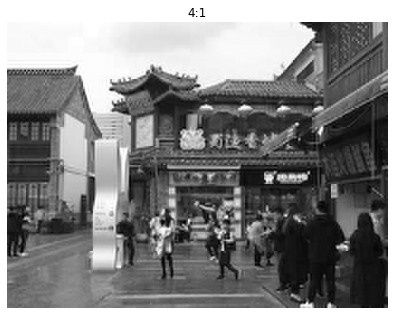

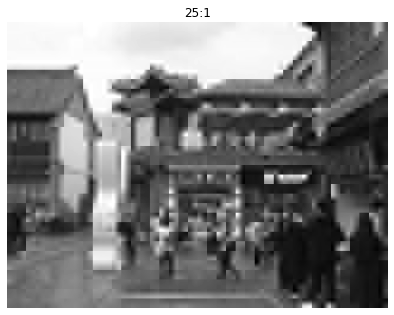

In [77]:
# Plot your reconstructions.
plt.figure(figsize=(15,12))
plt.subplot(2,2,1); Show(f, title='Original');
# === YOUR CODE HERE ===
plt.figure(figsize=(15,12))
plt.subplot(2,2,1); 
Show(decompressed1,'2:1')
plt.figure(figsize=(15,12))
plt.subplot(2,2,1); 
Show(decompressed2,'4:1')
plt.figure(figsize=(15,12))
plt.subplot(2,2,1); 
Show(decompressed3,'25:1')